In [45]:
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('bmh')
%matplotlib widget

### Argument list and corresponding values of functions $x \rightarrow x^2$ and $x \rightarrow \sin(x)$
Let's try to calculate the gradient of the function with values given.

In [3]:
# argument data
lbound, rbound, num = -2, 2, 7
arg_pts = np.linspace(lbound, rbound, num=num)

In [4]:
# gradients for x**2:
pow2_pts = np.power(arg_pts, 2)

pow2_num_grad = np.gradient(pow2_pts,arg_pts)
pow2_tru_grad = 2*arg_pts

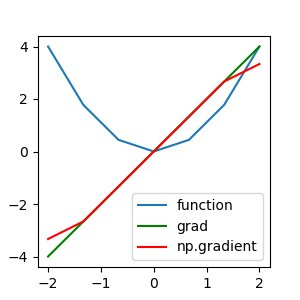

In [5]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(arg_pts, pow2_pts,c="tab:blue", label="function")
ax.plot(arg_pts, pow2_tru_grad,  c="g", label="grad")
ax.plot(arg_pts, pow2_num_grad,  c="r", label="np.gradient")
plt.legend()
plt.show()

In [6]:
# gradients for sin(x):
sin_pts = np.sin(arg_pts)

sin_num_grad = np.gradient(sin_pts, arg_pts)
sin_tru_grad = np.cos(arg_pts)

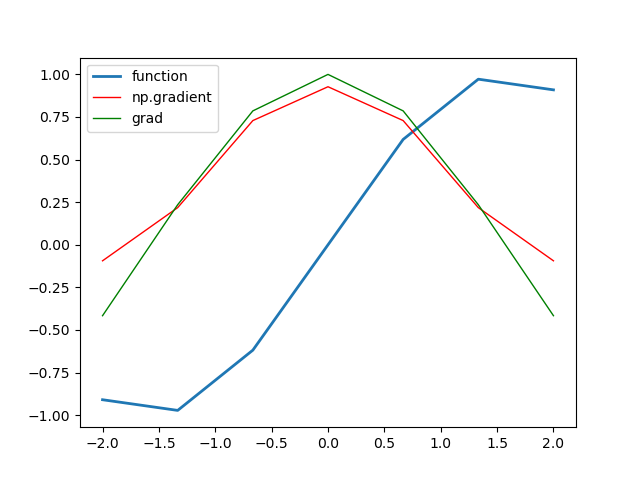

In [7]:
fig2, ax2 = plt.subplots()
ax2.plot(arg_pts, sin_pts, c="tab:blue",lw=2, label="function")
ax2.plot(arg_pts, sin_num_grad,c="r",   lw=1, label="np.gradient")
ax2.plot(arg_pts, sin_tru_grad,c="g",   lw=1, label="grad")
plt.legend()
plt.show()

#### Endpoints
Notice the difference on the edge of the definition, there is a remedy for that, namely additional argument edge_order=2 which\
causes np.gradient to use higier order aproximation and for the above functions it removes outliers at the edges.

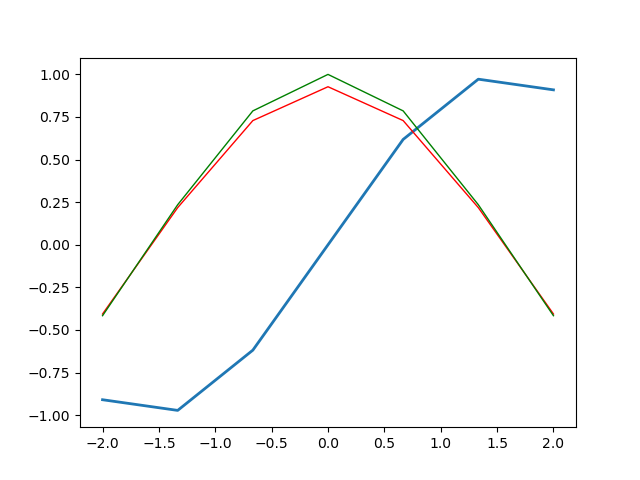

In [8]:
# compare with edge_order=2
sin_pts = np.sin(arg_pts)

sin2_num_grad = np.gradient(sin_pts, arg_pts, edge_order=2)
sin2_tru_grad = np.cos(arg_pts)

fig3, ax3 = plt.subplots()
ax3.plot(arg_pts, sin_pts, c="tab:blue",lw=2, label="function")
ax3.plot(arg_pts, sin2_num_grad,c="r",lw=1)
ax3.plot(arg_pts, sin2_tru_grad,c="g",lw=1)
plt.show()

##### What if the data is not sorted

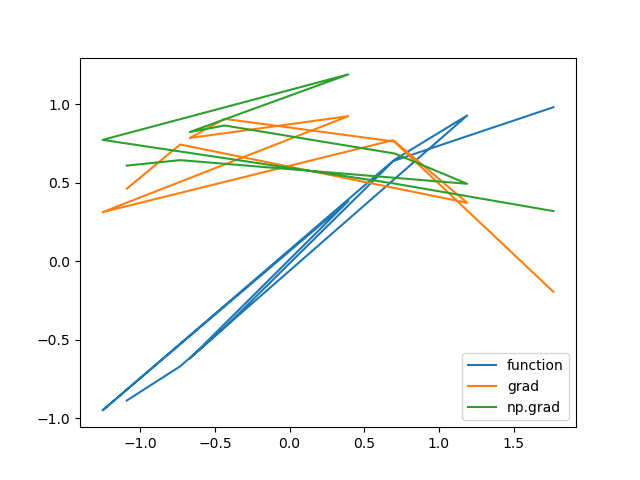

In [9]:
# random data
rng = np.random.default_rng(12345)

lbound, rbound, num = -2, 2, 10
x_rand = lbound + (rbound - lbound) * rng.random(num)

y_rand_sin = np.sin(x_rand)
y_rand_tru_grad = np.cos(x_rand)
y_rand_num_grad = np.gradient(y_rand_sin, x_rand)

fig4, ax4 = plt.subplots()
ax4.plot(x_rand, y_rand_sin, label="function")
ax4.plot(x_rand, y_rand_tru_grad, label="grad")
ax4.plot(x_rand, y_rand_num_grad, label="np.grad")
plt.legend()
plt.show()

##### we need to sort the data for np.gradient
Check [advanced-indexing](https://numpy.org/doc/stable/user/basics.indexing.html?highlight=slice#advanced-indexing), for the meaning of\
```arr[ not a tuple object ]```, for example ```arr[ list ]``` or ```arr[ list of lists ]```

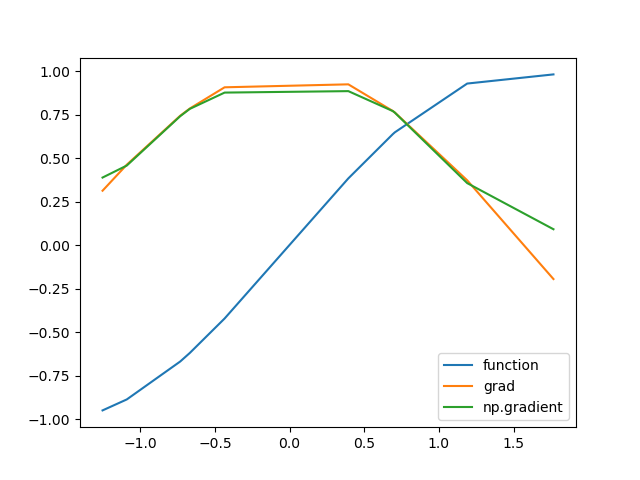

In [10]:
data_rand = np.array([x_rand, y_rand_sin])

# get the indecies of a sorted first row (with .argsort()) and change the order of both rows:
data_sorted = data_rand[:, data_rand[0,:].argsort() ]

data_grad = np.copy(data_sorted)
data_grad[1] = np.cos(data_grad[0])

data_npgrad = np.copy(data_sorted)
data_npgrad[1] = np.gradient(data_npgrad[1], data_npgrad[0])

fig5, ax5 = plt.subplots()
ax5.plot(*data_sorted, label="function")
ax5.plot(*data_grad, label="grad")
ax5.plot(*data_npgrad, label="np.gradient")
plt.legend()
plt.show()

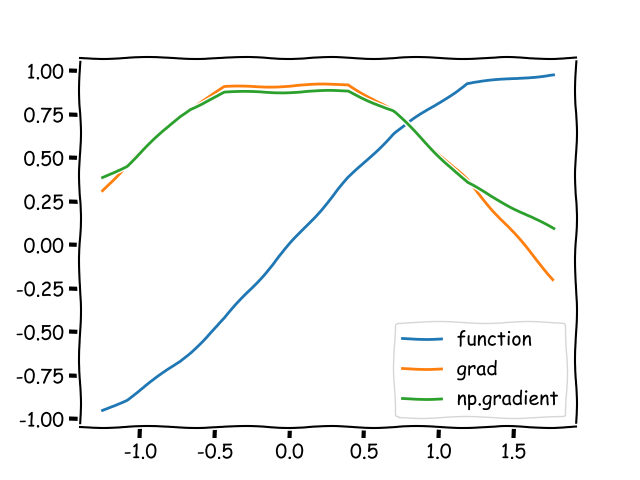

In [16]:
# for special occasion
with plt.xkcd():    # (scale=1, length=200, randomness=20):
    fig6, ax6 = plt.subplots()
    ax6.plot(*data_sorted, label="function")
    ax6.plot(*data_grad, label="grad")
    ax6.plot(*data_npgrad, label="np.gradient")
    plt.legend()
    plt.show()

### More dimensions in the argument
let's calculate the gradient of a function $$(x,y)\quad\rightarrow\quad -\frac{x^2}{4}-\frac{y^2}{4}$$

#### Evenly spaced points
We calculate data arrays and find np.gradient

In [25]:
# argument data 2D
x_lbound, x_rbound, x_num = -3, 2, 6
y_lbound, y_rbound, y_num = -3, 2, 6
pts_dist = np.abs(x_rbound - x_lbound)/(x_num-1)

x_arg_pts = np.linspace(x_lbound, x_rbound, x_num)
y_arg_pts = np.linspace(y_lbound, y_rbound, y_num)

x_s, y_s = np.meshgrid(x_arg_pts, y_arg_pts)

In [27]:
poly1_val = - (x_s**2)/4 - (y_s**2)/4
#x_s, y_s
poly1_true_grad_x, poly1_true_grad_y = - (x_s)/2, - (y_s)/2
poly1_num_grad = np.gradient(poly1_val, pts_dist, edge_order=2)

print(f"tru grad_y =\n{poly1_true_grad_y},\n tru grad_x = \n{poly1_true_grad_x}")
print(f"num grad_y =\n{poly1_num_grad[0]},\n num_grad_x \n{poly1_num_grad[1]}")
# poly1_num_grad[0], poly1_num_grad[1] == np.gradient(poly1_val, pts_dist, edge_order=2)

tru grad_y =
[[ 1.5  1.5  1.5  1.5  1.5  1.5]
 [ 1.   1.   1.   1.   1.   1. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]
 [-0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]],
 tru grad_x = 
[[ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]
 [ 1.5  1.   0.5 -0.  -0.5 -1. ]]
num grad_y =
[[ 1.5  1.5  1.5  1.5  1.5  1.5]
 [ 1.   1.   1.   1.   1.   1. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]],
 num_grad_x 
[[ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]
 [ 1.5  1.   0.5  0.  -0.5 -1. ]]


#### 3D plots of function and its gradient.
Note the difference in function definition

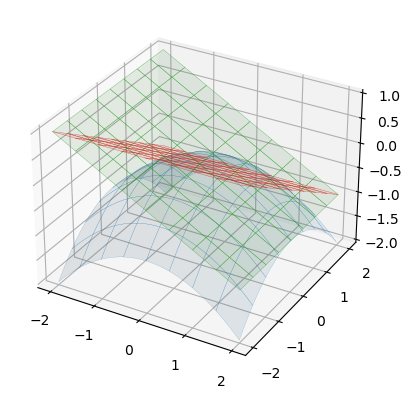

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# our function is sum of the same monomial at two variables, thus we can use:
mono = np.poly1d([-0.25,0,0], r=False)

# argument arrays creation, square in the domain with 
# lower left corner  = ll = (lb, lb) and 
# upper right corner = ur = (rb, rb)
ll, ur, step = -2, 2, 0.1

x_3d, y_3d = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]
z_3d = mono(x_3d) + mono(y_3d) # function data

f_grad_y,f_grad_x = np.gradient(z_3d, step, edge_order=2) #grad data

# Plot the 3D surface
ax_3d = plt.figure().add_subplot(projection='3d')
ax_3d.plot_surface(x_3d, y_3d, z_3d, edgecolor="tab:blue", lw=0.1, rstride=5, cstride=5, alpha=0.1)
# # with options: rstride=20, cstride=50; one can observe the trick how projection='3d' is rendering the surface.

# Plot the gradients
ax_3d.plot_surface(x_3d, y_3d, f_grad_x, edgecolor="tab:red", lw=0.2, rstride=5, cstride=5, alpha=0.1)
ax_3d.plot_surface(x_3d, y_3d, f_grad_y, edgecolor="tab:green", lw=0.2, rstride=5, cstride=5, alpha=0.1)

plt.show()

#### For set of points that is non-uniform but grid-preserving
we have to feed np.gradient with lists of projections on axis,\
chcek varargs parameter in numpy reference [np.grad](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) option 3.\
Lets create nonuniform, nonequilateral grid of points:

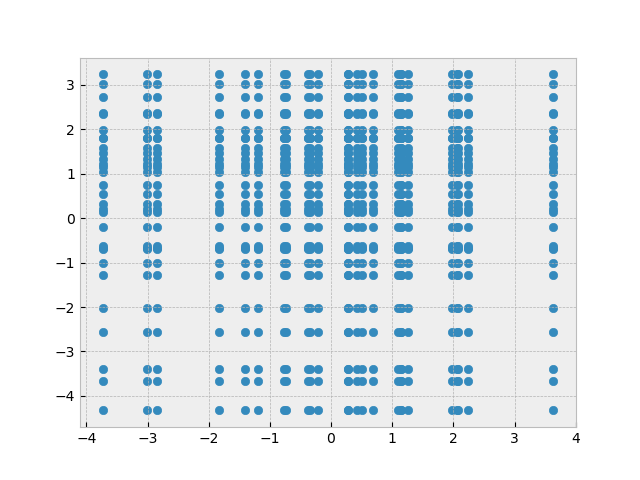

In [4]:
import numpy as np
rng = np.random.default_rng(16)
from scipy.stats import norm

sample_size_x, sample_size_y = 25, 30
x_sample, y_sample = np.sort(2*rng.standard_normal(sample_size_x)), np.sort(2*rng.standard_normal(sample_size_y))
x_nuni, y_nuni = np.meshgrid(x_sample, y_sample)

# One can check how the domain points looks like:
fig_dom,ax_dom = plt.subplots()
ax_dom.scatter(x_nuni, y_nuni)
plt.show()

We are going to plot the derivatives of density of gauss distribution.\
First the plot of the density itself.

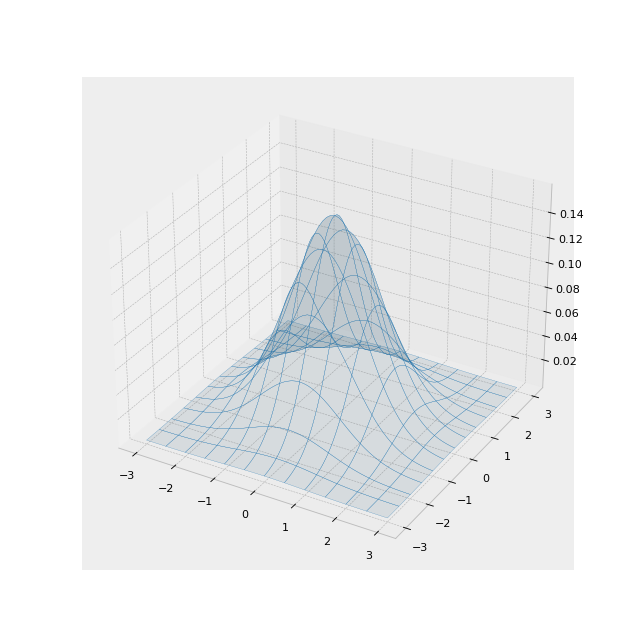

In [17]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal

ran_var = multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]])
# Note: ran_var has a method .pdf which gives us a density function of the ran_var "variable".

ll, ur, step = -3, 3, 0.1
x_pdf, y_pdf = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]
z_pdf = ran_var.pdf( np.dstack([x_pdf, y_pdf]) ) # values of the probability_density_function(pdf) at the regular grid x_pdf, y_pdf

# Ran_Var.pdf accepts pairs of points 
# Note: np.dstack return lists of k-dimensional "points" from separate lists of x_1 coordinates, x_2 coordinates, ..., x_k coordinates.
# e.g. x_pdf.shape = (41, 41), y_pdf.shape = (41, 41), then:
#     np.stack([x_pdf, y_pdf]).shape  = (2, 41, 41)    <- " two arrays (41,41)"
#     np.dstack([x_pdf, y_pdf]).shape = (41, 41, 2)    <- " 41 x 41 arrays of the length 2"
#     np.stack([x_pdf, y_pdf], axis=2).shape = (41, 41, 2)

# 3d figure setup
fig_N_pdf = plt.figure(figsize=(8, 8), dpi=80)
ax_3d = fig_N_pdf.add_subplot(projection='3d')

# plotting
ax_3d.plot_surface(x_pdf, y_pdf, z_pdf, edgecolor="tab:blue", lw=0.2, rstride=5, cstride=5, alpha=0.1)

plt.show()

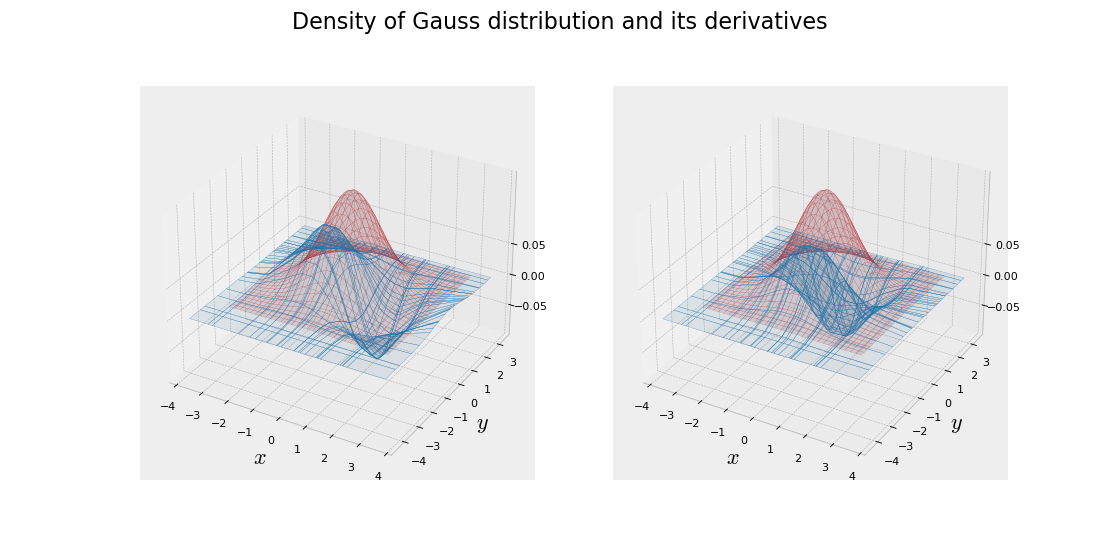

In [36]:
# gradient calculation
pdf_z_nuni = ran_var.pdf( np.dstack([x_nuni, y_nuni]) )
nuni_grad_y, nuni_grad_x = np.gradient(pdf_z_nuni, y_sample, x_sample, edge_order=2)

# 3d figure setup
fig = plt.figure(figsize=(14, 7), dpi=80)
fig.suptitle('Density of Gauss distribution and its derivatives', fontsize=20)

ax_dx = fig.add_subplot(1, 2, 1, projection='3d')
ax_dx.set_xlabel('$x$', fontsize=20)
ax_dx.set_ylabel('$y$', fontsize=20)
ax_dx.set_zticks([-0.05,0,0.05])

ax_dy = fig.add_subplot(1, 2, 2, projection='3d')
ax_dy.set_xlabel('$x$', fontsize=20)
ax_dy.set_ylabel('$y$', fontsize=20)
ax_dy.set_zticks([-0.05,0,0.05])


# Plotting:
ax_dx.plot_surface(x_nuni, y_nuni, nuni_grad_x, edgecolor="tab:blue", lw=0.2, alpha=0.1) #x derivative
ax_dx.plot_surface(x_pdf, y_pdf, z_pdf, edgecolor="tab:red", lw=0.1, rstride=2, cstride=2, alpha=0.1)

ax_dy.plot_surface(x_nuni, y_nuni, nuni_grad_y, edgecolor="tab:blue", lw=0.2, alpha=0.1) #y derivative
ax_dy.plot_surface(x_pdf, y_pdf, z_pdf, edgecolor="tab:red", lw=0.1, rstride=2, cstride=2, alpha=0.1)

plt.show()

Comparison with $$\frac{\partial}{\partial x}\;\;\frac{1}{2\pi}e^{-(x^2+y^2)/2} = -x\cdot\frac{1}{2\pi}e^{-(x^2+y^2)/2} $$

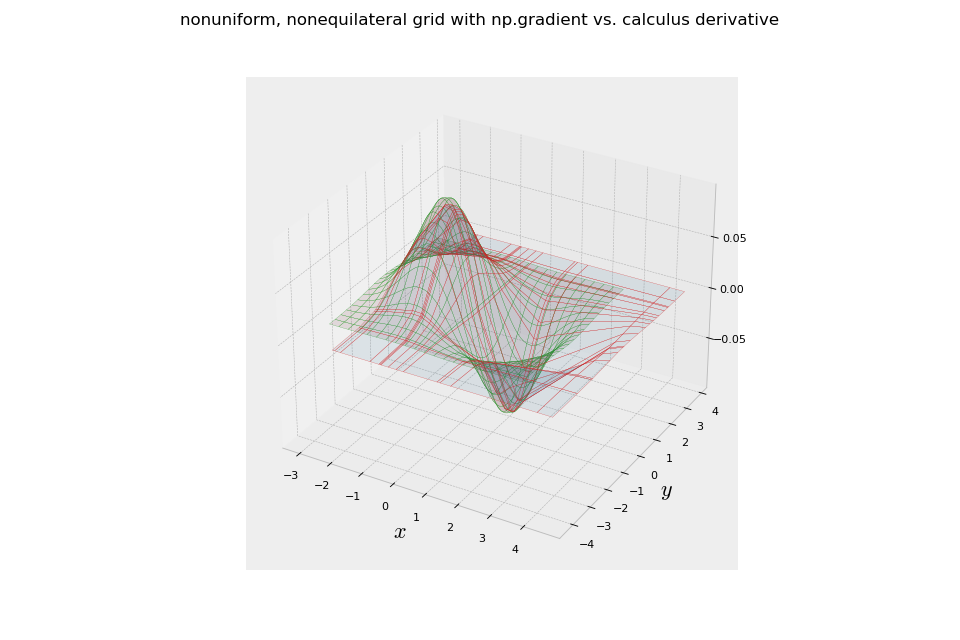

In [37]:
# data for the formula function
ll, ur, step = -3, 3, 0.1
x_pdf, y_pdf = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]
tru_dx = -x_pdf * ran_var.pdf( np.dstack([x_pdf, y_pdf]) )

# data for the np.gradient
sample_compa_x, sample_compa_y = 15, 20
compa_x_sample, compa_y_sample = np.sort(2*rng.standard_normal(sample_compa_x)), np.sort(2*rng.standard_normal(sample_compa_y))
compa_x_nuni, compa_y_nuni = np.meshgrid(compa_x_sample, compa_y_sample)

# pdf function values and gradient
compa_pdf_z_nuni = ran_var.pdf( np.dstack([compa_x_nuni, compa_y_nuni]) )
compa_grad_y, compa_grad_x = np.gradient(compa_pdf_z_nuni, compa_y_sample, compa_x_sample, edge_order=2)



fig = plt.figure(figsize=(12, 8), dpi=80)
fig.suptitle('nonuniform, nonequilateral grid with np.gradient vs. calculus derivative', fontsize=15)

ax_compa = fig.add_subplot(projection='3d')
ax_compa.set_xlabel('$x$', fontsize=20)
ax_compa.set_ylabel('$y$', fontsize=20)
ax_compa.set_zticks([-0.05,0,0.05])

ax_compa.plot_surface(compa_x_nuni, compa_y_nuni, compa_grad_x, edgecolor="tab:red", lw=0.2, alpha=0.1)
ax_compa.plot_surface(x_pdf, y_pdf, tru_dx, edgecolor="tab:green",rstride=3, cstride=3, lw=0.2, alpha=0.1)

plt.show()

#### Exercise: Calculate gradient of a function given at random sample points (no grid structure of arguments).
This is "true" exercise, i dont know the answer, some ideas(or misleading ideas):
1) gridization (minimal grid that contain the sample) of a random sample with some aproximation of\
    points in between (seems hard if for example our random sample is set of points on a circle,\
    we only have values on the circle but we have to fill the disk, some sort of interpolation )
2) triangulation of a sample and take some meaningful minimal grid.

### Linear regression
Start with set of points with random "noise"

In [4]:
import numpy as np
from numpy.polynomial import Polynomial

rng = np.random.default_rng(12345)

import matplotlib.pyplot as plt

# # basic definitions and constant setup
# def line(a, x):
#     """self code review:  np.poly1d([slope,0]) is more versatile and already in numpy lib no need for function called line 
#        pro code review: np.poly1d is legacy  """
#     return a*x

num = 100
standard_deviation = 5
min_slope, max_slope = -10, 10
lbound, rbound = -11, 12

slope = 1.2223219401418888


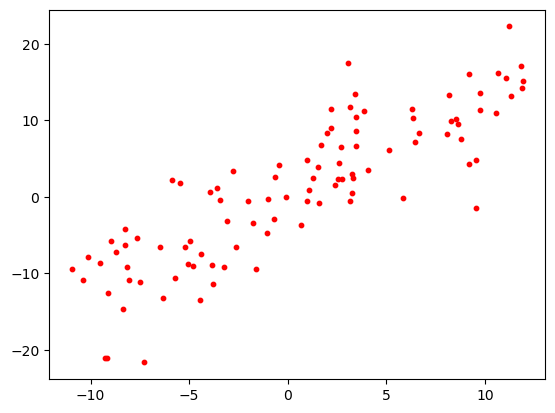

In [8]:
# # the slope
slope = min_slope + (max_slope - min_slope) * rng.random() # random slope in [min_slope, max_slope) range
# # data sample
x = lbound + (rbound - lbound) * rng.random(num)           # random first coordinate
noise = standard_deviation * rng.standard_normal(num)      # the noise

# # putting *line with *noise together
pts = np.stack((x, noise), axis=0).T
# arr = np.apply_along_axis(lambda pt : np.array([pt[0], np.poly1d([slope,0])(pt[0]) + pt[1]]), axis=1, arr=arr)  <- unclear, long and bad
# pts[:,1] += np.poly1d([slope,0])(pts[:,0])    # better
pts[:,1] += np.polynomial.Polynomial([0, slope])(pts[:,0])

print(f'slope = {slope}')
plt.scatter(*pts.T, s=10, c='red')
plt.show()

#### NUMPY

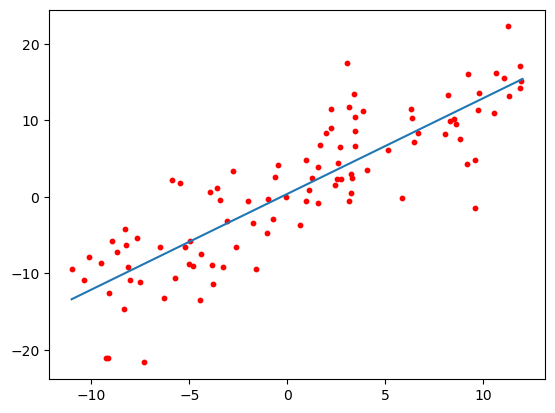

In [11]:
# NUMPY linear regression (check also np.linalg.lstsq)
m,b = np.polyfit(pts.T[0], pts.T[1], deg=1)

x = np.linspace(lbound, rbound, 10)
y = m*x+b

fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(*pts.T, s=10, c='red')
plt.show()

The result of ```Polynomial.fit``` is power series class (same as ```Polynomial```)\
and power series class have method ```linspace([n, domain])``` which return pair: x, y ndarray suitable for plotting.

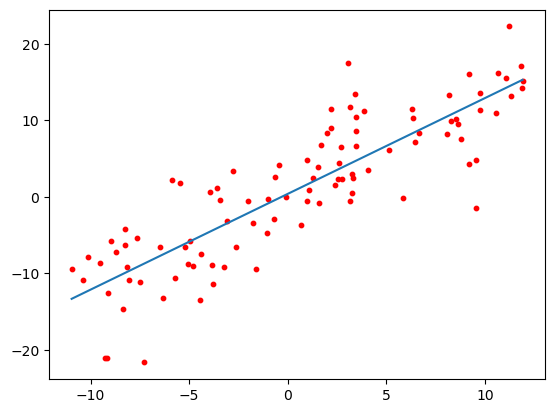

In [37]:
# with np.polynomial.polynomial.Polynomial.fit
import numpy as np
from numpy.polynomial import Polynomial
rng = np.random.default_rng(12345)
import matplotlib.pyplot as plt

poly = Polynomial.fit(pts.T[0], pts.T[1], deg=1)
# poly_coef = Polynomial.fit(pts.T[0], pts.T[1], deg=1).convert().coef

# print(Polynomial.fit(pts.T[0], pts.T[1], deg=1).convert().coef)
# print(Polynomial.fit(pts.T[0], pts.T[1], deg=1))

# x = np.linspace(lbound, rbound, 10)
# y = Polynomial(poly_coef)(x)
# y = m*x+b

fig, ax = plt.subplots()

# ax.plot(x,y) 
ax.plot(*poly.linspace())

ax.scatter(*pts.T, s=10, c='red')
plt.show()

##### More with polyfit

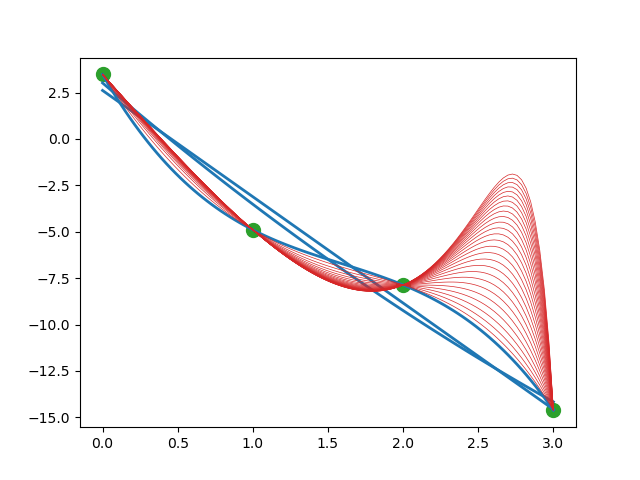

In [25]:
# with polyfit is is easy to see the wild oscillations with too high degree compared with the data.

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(14)
%matplotlib widget


import warnings
warnings.simplefilter('ignore', np.RankWarning)

# 2 numbers to control the figure
num_of_data = 4
overhead = 25

# small data generation
x_data = np.arange(0, num_of_data)
y_data = 5*rng.standard_normal(num_of_data)

# plotting must-lines 
x = np.linspace(0, x_data[-1], 100)
fig, ax = plt.subplots()

max_deg = num_of_data + overhead
for i in range(max_deg):
    numpy_poly = np.polyfit(x_data,y_data, deg=1+i, full=False)
    ax.plot(x, np.poly1d(numpy_poly)(x),
            c= "tab:blue" if i<num_of_data-1 else "tab:red",
            lw= 2 if i<num_of_data-1 else 0.5)
ax.scatter(x_data,y_data, s=100, c='tab:green')
plt.show()

##### numpy.linalg.lstsq
least-squares solution to a linear matrix equation

#### SCIPY

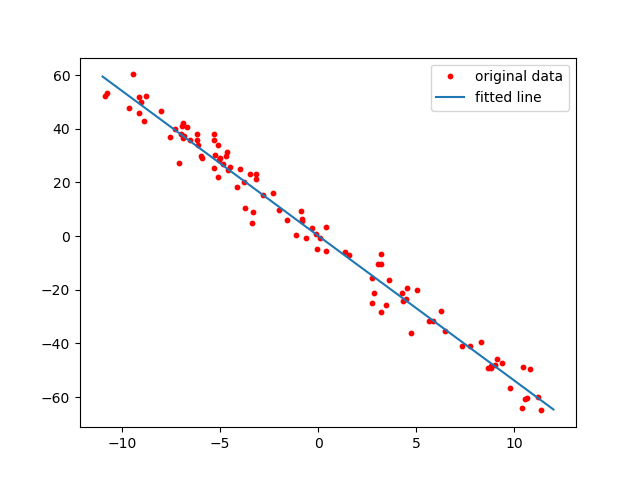

In [41]:
# SCIPY linear regression 

if 'x' in globals(): del x
if 'y' in globals(): del y
from scipy import stats

res = stats.linregress(pts.T[0], pts.T[1])

x = np.linspace(lbound, rbound, 10)

fig, ax = plt.subplots()
ax.plot(*pts.T, 'o', c='r', markersize=np.sqrt(10), label='original data')
ax.plot(x, res.intercept + res.slope*x, 'tab:blue', label='fitted line')
plt.legend()

# Notice the markersize and compare with s=10 in plt.scatter above, why is that? Asn: (also notice the author)
# https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size/47403507#47403507

#### SKLEARN

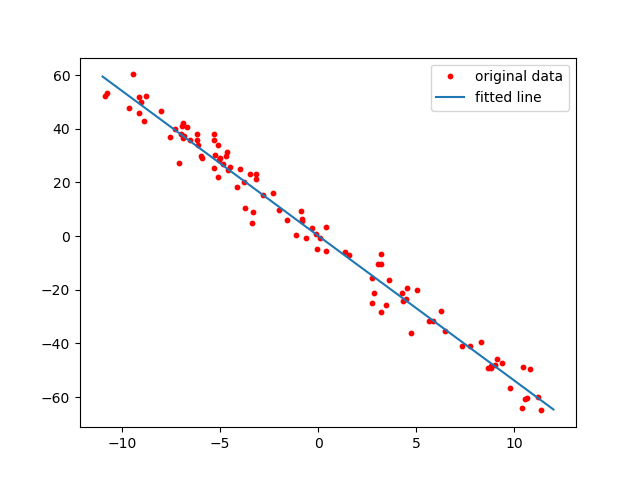

In [44]:
# linear regression ML sklearn 
from sklearn.linear_model import LinearRegression

if 'x' in globals(): del x
if 'y' in globals(): del y

reg = LinearRegression()       # this is our black-box 

""" We feed black box data about x and y coordiinates 
    LinearRegression do not accept 1-dim arrays therefore *.reshape(-1,1) """
reg.fit( pts.T[0].reshape(-1,1), pts.T[1].reshape(-1,1) ) 

x = np.linspace(lbound, rbound, 10).reshape(-1,1)
y = reg.predict(x)            # here we USE the model reg

fig, ax = plt.subplots()
ax.plot(*pts.T, 'o', c='r', markersize=np.sqrt(10), label='original data')
ax.plot(x, y, label='fitted line')
plt.legend()

# # What is going on outside lbound, rbound:
# x_out = np.linspace(lbound-50, rbound+50, 10).reshape(-1,1)
# y_out = reg.predict(x_out)
# plt.plot(x_out, y_out, 'r')
# plt.show()

### Polynomial Regression
Packages numpy, scipy and sklearn provide functions to approximate data with polynomial functions.

In [25]:
# First we need to generate polynmial data (check np.polyval )
if 'x' in globals(): del x
if 'y' in globals(): del y

num, standard_deviation = 100, 20
p = np.array([.2, -2,-4, .1]) # polynomial coefficients

x = lbound + (rbound - lbound) * rng.random(num)
y = np.polyval(p, x) + standard_deviation * rng.standard_normal(num) 

# fig, ax = plt.subplots()
# ax.plot(x,y, 'o', label='original data')
# plt.show()

#### In scipy

In [30]:
# in scipy there is module called: Orthogonal distance regression
# which calculate the distance a little differently
from scipy import odr

# creating a model
poly_model = odr.polynomial(order=3)

# feed our point into the model
data = odr.Data(x, y) # check: data.__dict__

```poly_model``` is our particaluar model we gonna train,\
```data``` is data prepared by scipy to feed models.\
The traning is performed by executing .run on a [function called ODR](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.ODR.html#scipy.odr.ODR) which gather the model and the data.

In [31]:
odr_obj = odr.ODR(data, poly_model) # ODR pair data and model
output = odr_obj.run() # here traning is performed
# output.pprint()

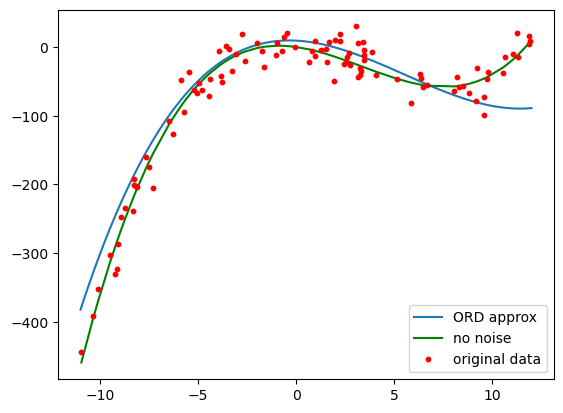

In [28]:
poly_coeff = output.beta[::-1] # [::-1] is axis=0 backwards, since slicing works like this [start:stop:step]

x_even_pts = np.linspace(lbound, rbound, 100)
y_scipy_val = np.polyval(poly_coeff, x_even_pts)

fig, ax = plt.subplots()
ax.plot(x_even_pts, y_scipy_val, label='ORD approx')
ax.plot(np.sort(x), np.polyval(p, np.sort(x)), c='g', label='no noise')
ax.plot(x,y, 'o',c='r', markersize=np.sqrt(10), label='original data')
plt.legend()
plt.show()
# for ORD fit is quite bad, what is wrong?

Question/exercise: calculate orthogonal distacne to "no noise" above.

#### In sklearn

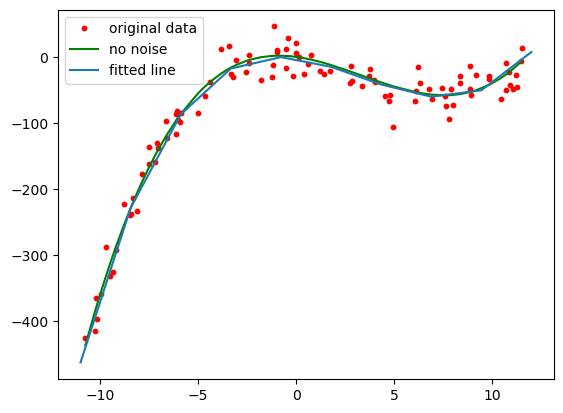

In [9]:
# using sklearn ( below example is taken from https://youtu.be/H8kocPOT5v0 )
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# inform the model that you want polynomial approximation
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1,1)) 

# traning
reg = LinearRegression()
reg.fit( x_poly, y.reshape(-1,1) ) 

# where you want to plot
x_plot = np.linspace(lbound, rbound, 10).reshape(-1,1)

# getting the data from the model
x_plot_poly = poly_features.transform(x_plot)
y_plot_poly = reg.predict(x_plot_poly)

fig, ax = plt.subplots()
ax.plot(x,y, 'o', c='r', markersize=np.sqrt(10), label='original data')
ax.plot(np.sort(x), np.polyval(p, np.sort(x)), 'g', label='no noise')
ax.plot(x_plot, y_plot_poly, label='fitted line')
plt.legend()
plt.show()

### scipy optimize - finding minima of a function
In situation when we have callable function f we can find aproximation of minimum with Gradient descent algoritms

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [52]:
from scipy.optimize import minimize

#### Dimension 1
lets investigate fucntion $$\text{fun}(x) = x^{2}-\sin\left(3x\right) $$

In [48]:
def fun(x: float):
    return np.power(x,2)-np.sin(3*x)

In [49]:
print(minimize(fun, x0=-0.681, method='CG'))
print(f"\n conjugate gradient algorithm fall into two different local minima\n")
print(minimize(fun, x0=-0.679, method='CG'))

     fun: 0.9908353197221481
     jac: array([5.77419996e-06])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 1
    njev: 9
  status: 0
 success: True
       x: array([-1.24458946])

 conjugate gradient algorithm fall into two different local minima

     fun: -0.7759735999687959
     jac: array([-7.4505806e-07])
 message: 'Optimization terminated successfully.'
    nfev: 22
     nit: 2
    njev: 11
  status: 0
 success: True
       x: array([0.42730777])


#### Dimension 2
with x,y there are intresting functions possible:\
1) Rosenbrock
$$ \text{Rosenbrock}(a=1,b=100)(x,y) = (a-x)^{2}+b(y-x^{2})^{2} $$
or in $n$ dimensions
$$\text{Rosenbrock}\left(\vec{a}=\left[\:1,1,\ldots,1\:\right],\:\vec{b}=\left[\:100,\ldots,100\:\right]\right)\left(x_0,x_1,\ldots,x_{n-1}\right) =
    \sum _{i=0}^{n-2}\left[b_i\left(x_{i+1}-x_{i}^{2}\right)^{2}+\left(a_i-x_{i}\right)^{2}\right]$$
2) Eggholder
$$\text{Egg-holder}\left(x_0,x_1,\ldots,x_{n-1}\right)=
    \sum_{i=0}^{n-2}\left[
        -x_i\sin\left(\sqrt{\left|x_i-(x_{i+1}+47)\right|}\right)
       -\left(x_{i+1}+47\right)\sin\left(\sqrt{\left|0.5x_i+(x_{i+1}+47)\right|}\right)\right]$$

Egg-holder formula taken from:\
[Ali R. Al-Roomi (2015). Unconstrained Single-Objective Benchmark Functions Repository. Halifax, Nova Scotia, Canada: Dalhousie University, Electrical and Computer Engineering.](https://al-roomi.org/benchmarks/unconstrained/n-dimensions/187-egg-holder-function) (surf with caution)

It might be a good idea to rewatch [this excellent video](https://youtu.be/R8-oAqCgHag) on stars and slashes inside parameter list of function definition.\
Function compose is similar in fasion to [Wolfram's Composition](https://reference.wolfram.com/language/ref/Composition.html), another example is [here in geeksforgeeks](https://www.geeksforgeeks.org/function-composition-in-python/) tutorial, or one can also use library [funcy](https://funcy.readthedocs.io/en/stable/funcs.html#compose).

One may check more of those naughty functions on which algoritms struggle [different test functions](https://en.wikipedia.org/wiki/Test_functions_for_optimization).


##### Rosenbrock(rbfun) and Egg-holder(eggholder) code definitions:

In [50]:
def rbfun(x: np.ndarray, arg: np.ndarray):
    """ arg: array/list of shape (2,), (2, 1) or (2, len(x))"""
    y = x[ 1:]
    x = x[:-1]
    return np.sum(arg[1]*(y-x**2)**2 + (arg[0]-x)**2)

from functools import reduce
def compose(*list_of_functions):
    """ Clarity and less parentheses in longer function compositions.
        Returns: callable that is the composition of functions from list_of_functions, the first is the most outer function.
        Example:
            compose(f,g,h)(.) = (f \circ g \circ h)(.) = f(g(h(.)))
        """
    return reduce(lambda f, g: lambda x : f(g(x)), list_of_functions)

def eggholder(x):
    """ np.sum the the end can eat whole .shape. We have to specify where to apply eggholder, in the ussual case it should be used like this:
            np.apply_along_axis(eggholder, axis=-1, arr=np.dstack([x1, x2, x3, ..., xn]) )
        """
    y = x[ 1:]
    x = x[:-1]
    # you can: np.sin( np.sqrt( np.abs( ... sth ... ))) OR use "almost circ notation" for composition:
    comp  = compose(np.sin, np.sqrt, np.abs)
    
    # return np.sum(-x* np.sin( np.sqrt( np.abs(x-y-47))) - (y+47)*np.sin( np.sqrt( np.abs(0.5*x+y+47))) ) # left for the speed test
    return np.sum(-x * comp(x-y-47) - (y+47) * comp(0.5*x+y+47) )

In [20]:
# ros_min = np.array([1,1,1,1,1])
# ros_arg = np.array([1,100])
# rbfun(ros_min,ros_arg)

egg_x = np.arange(7)
eggholder(egg_x)

-245.27698191896658

#### Finding local and global minima:

##### Rosenbrock
Used examples from [Contour Demo](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#contour-demo).

In [44]:
# Data creation:
def data_for_imgshow(func, *args, ll=-1, ur=1, step=0.1):
    x_3d, y_3d = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]
    return np.apply_along_axis(lambda x: func(x, *args), axis=-1, arr=np.dstack([x_3d, y_3d]))

# contour lines need grid data:
rb_x_3d, rb_y_3d = np.mgrid[ 0:2.001:0.001, 0:2.001:0.001 ]

rb_data = data_for_imgshow(rbfun, [1,100], ll=0, ur=2, step=0.001) # step=0.001 takes long but with 0.01 cutting color at 1e-3 yelds artifacts
# rb_data

In [45]:
%store rb_data
# %store -r rb_data

Stored 'rb_data' (ndarray)


##### Rosenbrock minimum
Lets say that we want to see the iteration points, ok. Look first [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy-optimize-minimize)
in parameters section, there are ```options``` and ```callback``` that can help us in our quest.\
In options for [method=’CG’](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cg.html#minimize-method-cg) we find ```return_all``` and live happily ever after.

In [55]:
# Rosenbrock minimum
rb_results = {}

x0, args = np.array([1.75,1.5]), np.array([1,100]) 
fun = lambda x, arg: rbfun(x, arg)

# solution with conjugate gradient algorithm:
rb_results['GC'] = minimize(fun, x0=x0, args=args, method='CG', options={'disp': False, 'return_all' : True})
rb_GC_iters = np.array(rb_results['GC'].allvecs).T    # *.allvecs is a list thus to use it in a scatter plot we need to np.array it.
rb_GC_iters

array([[1.75      , 1.27494962, 1.25498889, 1.2539479 , 1.15717128,
        1.01749376, 1.01544062, 1.00018715, 0.9994868 , 0.99948293,
        0.99991046, 0.99991039, 0.99999552],
       [1.5       , 1.63554279, 1.57328811, 1.57336813, 1.33242953,
        1.03018911, 1.03118131, 1.00008086, 0.99896173, 0.99896417,
        0.99982041, 0.99982062, 0.99999102]])

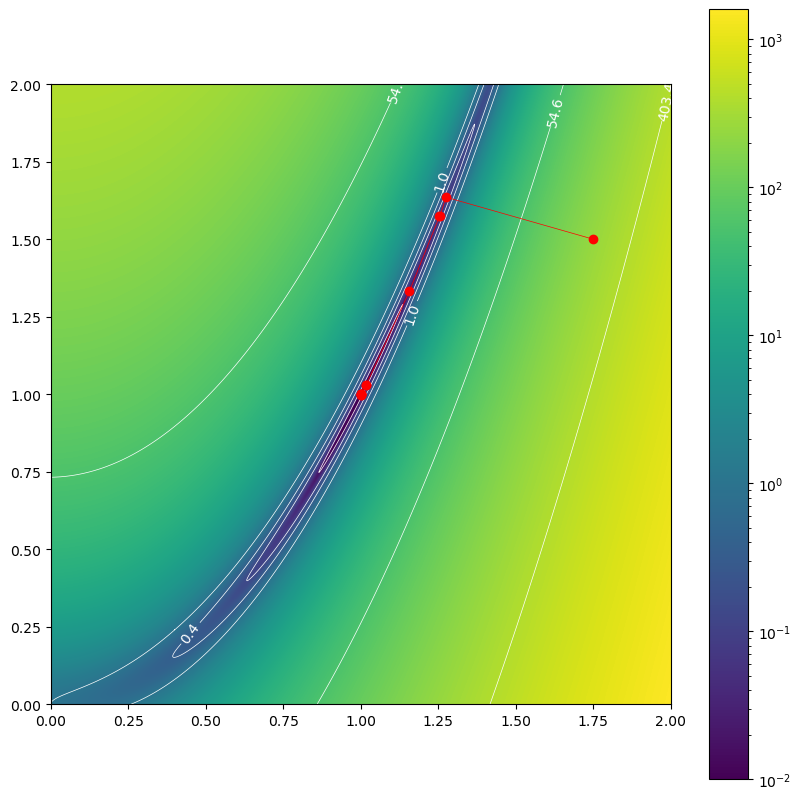

In [62]:
from matplotlib.colors import LogNorm, SymLogNorm
plt.rcParams['contour.negative_linestyle'] = 'solid'

rb_extent = 0, 2, 0, 2

rb_fig = plt.figure(figsize=(10,10), dpi=100)
rb_ax = rb_fig.add_subplot()

# colorful imshow
im = rb_ax.imshow(rb_data.T, cmap=cm.viridis, norm=LogNorm(vmin=1e-2, vmax=None),
             extent=rb_extent, origin='lower', interpolation='bilinear')
plt.colorbar(im)

CS = rb_ax.contour(rb_x_3d, rb_y_3d, rb_data, np.exp([-4,-2,-1,0,4,6]), colors='w', linewidths=0.5, norm=SymLogNorm(1e-16))
rb_ax.clabel(CS, levels=np.exp([-1,0,4,6]), inline=True, fontsize=10)

# GC steps of the iterations
rb_ax.scatter(*rb_GC_iters, color='red', s=10)
# itr_path = rb_ax.plot(*rb_GC_iters, color='red', marker='o', ms=6, linewidth=0.5) # exercise: make lines with arrows in the middle

plt.show()

Question: how to make arrows in the middles(maybe not*) of the red lines above that will indicate the direction of evolution of algoritm.
(maybe not*)- maybe locking to middle is bad if we would like to have arrows that aren't on self-intersections of the curve.\
An attempt of solution can be found [here](https://stackoverflow.com/a/34018322).

##### Egg-Holder:

In [21]:
# Data creation:
ll, ur, step = -500, 500, 3 
x_3d, y_3d = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]

z_3d =  np.apply_along_axis(eggholder, axis=-1, arr=np.dstack([x_3d, y_3d]))

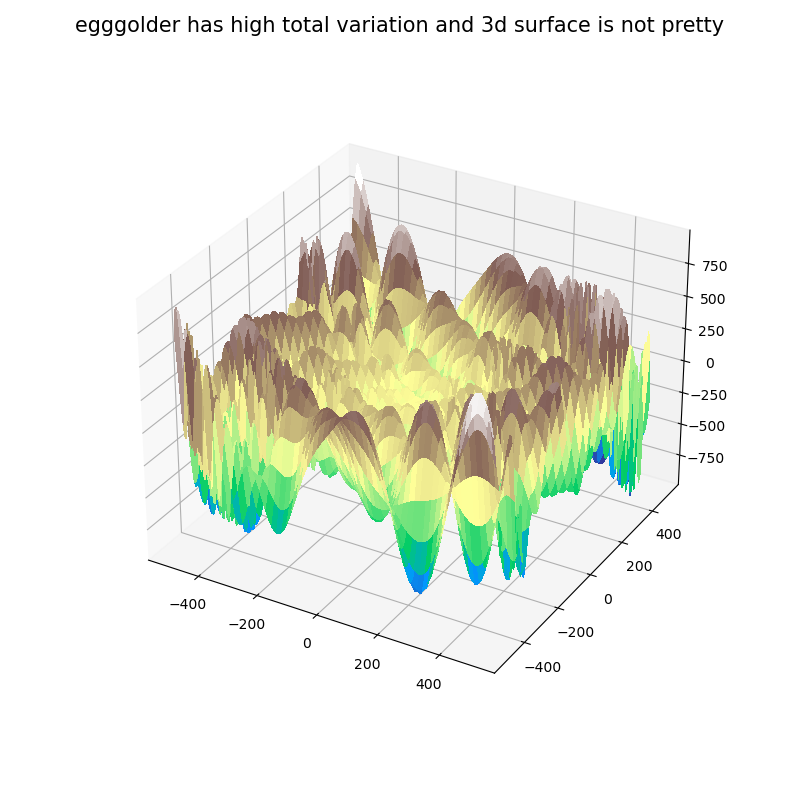

In [22]:
# Plot the 3D surface

fig = plt.figure(figsize=(8,8))
fig.suptitle('egggolder has high total variation and 3d surface is not pretty', fontsize=15)
ax_3d = fig.add_subplot(projection='3d')

ax_3d.plot_surface(x_3d, y_3d, z_3d, linewidth=0, antialiased=False, cmap=cm.terrain, rstride=6, cstride=6)

plt.show()

function ```matplotlib.pyplot.imshow``` might do the trick

In [5]:
# mind the step value, for step=1 eggholder will be evaluated 1M times

ll, ur, step = -1050, 1050, 5
x_3d, y_3d = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]

z_3d =  np.apply_along_axis(eggholder, axis=-1, arr=np.dstack([x_3d, y_3d]))

It took a while to calculate 177241 values of ```z_3d``` if only there was a way to save these data here for later use...\
Check [store magic](https://ipython.readthedocs.io/en/stable/config/extensions/storemagic.html), variables are saved in ```Users\(username)\.ipython\profile_default\db\autorestore```

```python
%store x         # stores   variable x
%store -r x      # restores variable x
%store -d x      # deletes  variable x
%store x >a.txt  # saves   value x to a.txt
%store y >>a.txt # appends value y to a.txt
```

In [8]:
%store z_3d
# %store -r x

Stored 'z_3d' (ndarray)


For a good image we need to  [adust axis and ticks](https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html#default-extent) with ```origin``` and ```extent``` parameters.\
Notice ```imshow``` do not tak arguments of a function eggholder, just the values for cmap to read.

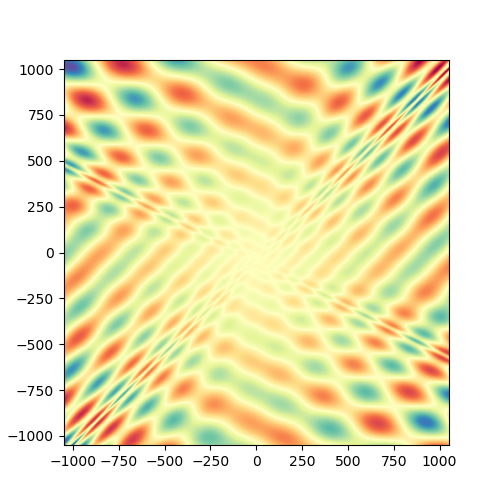

In [6]:
extent = np.min(x_3d), np.max(x_3d), np.min(y_3d), np.max(y_3d)

# NOTE: 
# parameters figsize and dpi both changes size of figure but:
#  -changing figsize do not change size of numbers at ticks 
#  -changing   dpi   do     change size of numbers at ticks
# With %matplotlib widget command bottom right triangle 
# controls the figsize but do not change the size of font

fig = plt.figure(figsize=(5,5), dpi=100)

ax = fig.add_subplot()
ax.imshow(z_3d.T, cmap=cm.Spectral, extent=extent, origin='lower', interpolation='bilinear') # Spectral, RdYlGn, PuOr "diverging maps"

plt.show()

Below is an [example](https://scipy.github.io/devdocs/tutorial/optimize.html#global-optimization) from scipy manual.

In [14]:
from scipy import optimize

results = dict() # in this dictionary under diffrent names we can store results from different methods.
bounds = [(ll, ur),(ll, ur)]

results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -2040.8402216922223
    funl: array([-2040.84022169])
 message: 'Optimization terminated successfully.'
    nfev: 33
     nit: 2
   nlfev: 28
   nlhev: 0
   nljev: 9
 success: True
       x: array([ 992.23447634, 1006.83628881])
      xl: array([[ 992.23447634, 1006.83628881]])

With ```.xl``` method of the result of optimize.shgo we obtain local minima found.\
Parameters n and iters are additional parameteras of simplicial homology global optimization.

In [19]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=512, iters=7, sampling_method='sobol')
list_of_local_minima = np.unique( np.round( results['shgo_sobol'].xl, decimals=3), axis=0)
# results['shgo_sobol']

     fun: -2062.3189840156
    funl: array([-2062.31898402, -2062.31898402, -2062.31898402, ...,
         -44.60261945,   -26.62493616,  1773.26825543])
 message: 'Optimization terminated successfully.'
    nfev: 105146
     nit: 7
   nlfev: 88762
   nlhev: 0
   nljev: 23222
 success: True
       x: array([1035.05698625,  985.58638715])
      xl: array([[ 1035.05698625,   985.58638715],
       [ 1035.05699768,   985.58639856],
       [ 1035.056927  ,   985.58632829],
       ...,
       [  -37.32419725,   -60.92561059],
       [   -6.19323226,   -71.38856396],
       [-1050.        ,  1050.        ]])

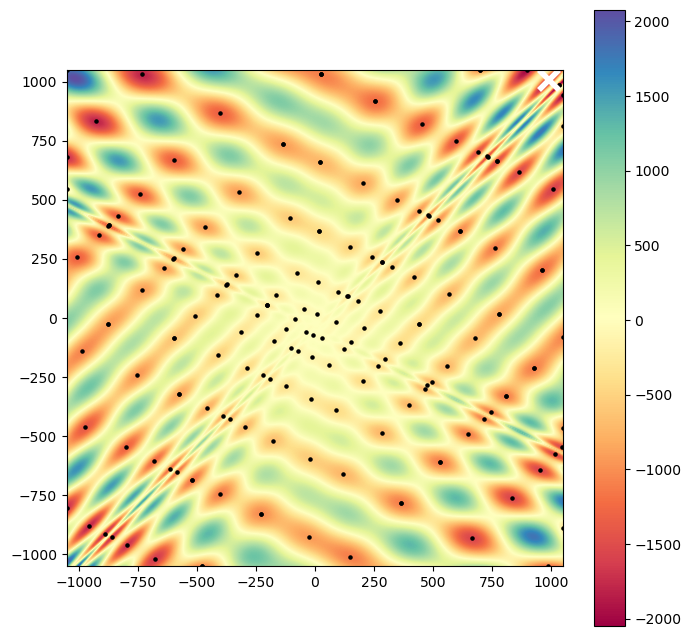

In [17]:
extent = np.min(x_3d), np.max(x_3d), np.min(y_3d), np.max(y_3d) 

fig = plt.figure(figsize=(8,8), dpi=100)
fig.clf()

ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(z_3d.T, cmap=cm.Spectral, extent=extent, origin='lower', interpolation='bilinear') # first to be visible
plt.colorbar(im)
#Useless/useful Question: why transpose the data image?

# Global in bounds
ax.plot(*results['shgo'].x, marker='x', color='white', ms=15, mew=4, ls="none")

# local minima
ax.scatter(*list_of_local_minima.T, color='black',s=5)

plt.show()